# Salient Region Detector example

This notebook shows how to use the main functionality of the `salientregions` package, namely the SalientDetector.

In [1]:
import numpy as np
import cv2
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import salientregions as sr

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


First, we load the image and show it.

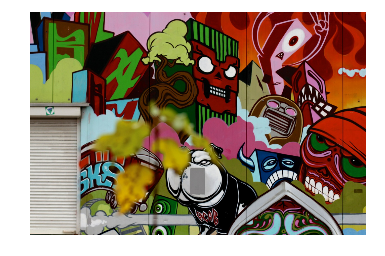

In [3]:
#Load the image
path_to_image = 'images/graffiti.jpg'
img = cv2.imread(path_to_image)
sr.show_image(img)

Now we create a SalientDetector object, with some parameters.

In [4]:
det = sr.SalientDetector(SE_size_factor=0.20,
                                lam_factor=4)

We ask the SalientDetector to detect all types of regions:

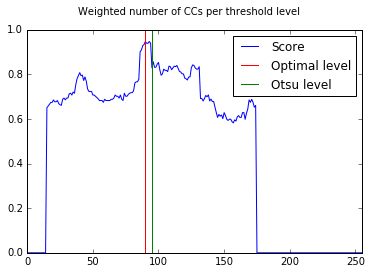

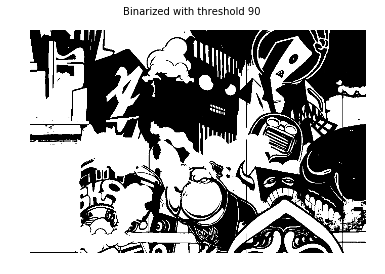

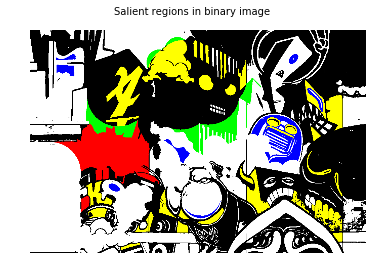

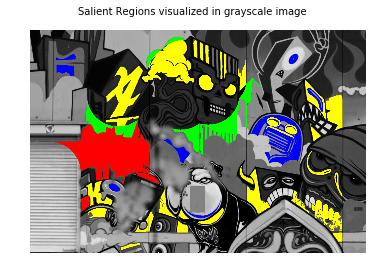

dict_keys(['holes', 'indentations', 'islands', 'protrusions'])


In [5]:
regions = det.detect(img,
                    find_holes=True,
                    find_islands=True,
                    find_indentations=True,
                    find_protrusions=True, 
                    visualize=True)
print(regions.keys())

We can also output the regions as ellipses

number of features per saliency type:  {'holes': 8, 'indentations': 7, 'islands': 32, 'protrusions': 2}


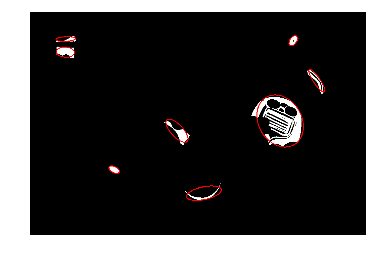

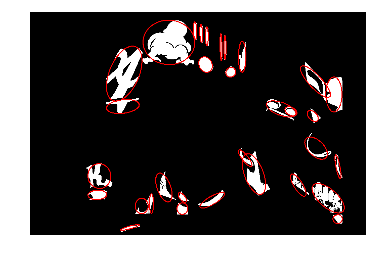

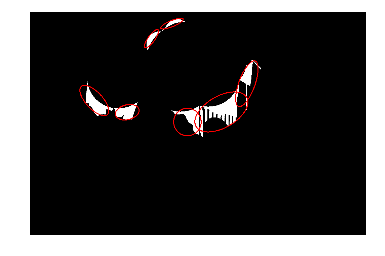

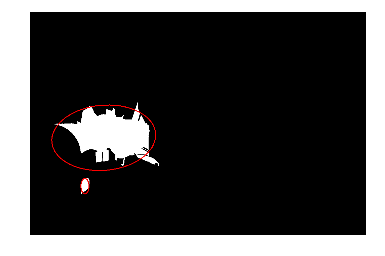

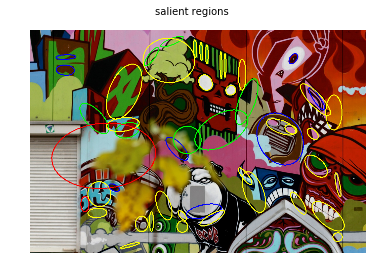

In [8]:
num_regions, features_standard, features_poly = sr.binary_mask2ellipse_features(regions, min_square=False)
print("number of features per saliency type: ", num_regions)
sr.visualize_ellipses(regions["holes"], features_standard["holes"])
sr.visualize_ellipses(regions["islands"], features_standard["islands"])
sr.visualize_ellipses(regions["indentations"], features_standard["indentations"])
sr.visualize_ellipses(regions["protrusions"], features_standard["protrusions"])
#print "Elliptic polynomial features:",  features_poly
sr.visualize_elements_ellipses(img, features_standard);

We can also save the elliptic parameters in text files. Below is an example of saving the polynomial coefficients of all regions represented as ellipses.

In [9]:
total_num_regions = sr.save_ellipse_features2file(num_regions, features_poly, 'poly_features.txt')
print("total_num_regions", total_num_regions)

total_num_regions 49


To load the saved features from file, use the loading funciton:

In [10]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))
import salientregions as sr
total_num_regions, num_regions, features = sr.load_ellipse_features_from_file('poly_features.txt')
print("total_num_regions: ", total_num_regions)
print("number of features per saliency type: ", num_regions)
#print "features: ", features

total_num_regions:  49
number of features per saliency type:  {'holes': 8, 'indentations': 7, 'islands': 32, 'protrusions': 2}
